# Predicting Heart Disease Using Machine Learning

This is a notebook created to study machine learning and various data science tools available via Python to build a machine learning model that can predict the presence of heart disease (or abnormal heart conditions) in a given person based on specific features. The data set utilized is an open-source toy dataset from the <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">**UCI Machine Learning Repository**</a> for the purposes of learning, and this model is not being monetized.

The general workflow will be as follows:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation (Or tuning hyperparameters, adjusting graphs, etc.)


## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data (As featured in UCI Heart Disease Dataset)

> Features explained briefly below this block, however available in more deatail via https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

> As a proof of concept, this project is aiming for around 95% accuracy currently

## 4. Features

* age = age
* sex = sex (as defined in the 90s as reproductive organs)
* cp = chest pain type
> 4 Main types:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbps = resting blood pressure
* chol = serum cholesterol in mg/dl
> A person's serum cholesterol level represents the amount of total cholesterol in their blood
* fbs = fasting blood sugar > 120 mg/dl
>  A fasting blood sugar test measures sugar (glucose) in your blood.
* restecg = resting electrocardiographic results (values 0,1,2)
> Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. (-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
> Angina is a type of chestpain caused by reduced blood flow to the heart, it is a symptom of coronary artery disease.
* oldpeak = ST depression induced by exercise relative to rest
> ST depression is a term that refers to the position of the ST segment in a person’s ECG results. On an ECG machine, it is the depression in the wave/line segment. 
* slope = the slope of the peak exercise ST segment
> This represents the slope of the ST segment, represented as: -- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* ca = number of major vessels (0-3) colored by flourosopy
* thal = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target = 0 for lack of heart disease, 1 for presence thereof

## Importing all the Tools

This project implements pandas, Matplotlib, and NumPy for our data analysis and manipulation

In [5]:
# Importing main data analysis (EDA or exploratory data analysis) tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allows plots to appear within notebook
%matplotlib inline

# scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Loading the data

In [6]:
df = pd.read_csv("data/heart-disease.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Ordered as (rows, columns)
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

We want to understand the data and become an expert on the specific data

We want to keep in mind:

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it? (.isna.sum() to check)
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get the most out of data

In [11]:
# Determining how many instances of disease, and how many instances of lack thereof
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

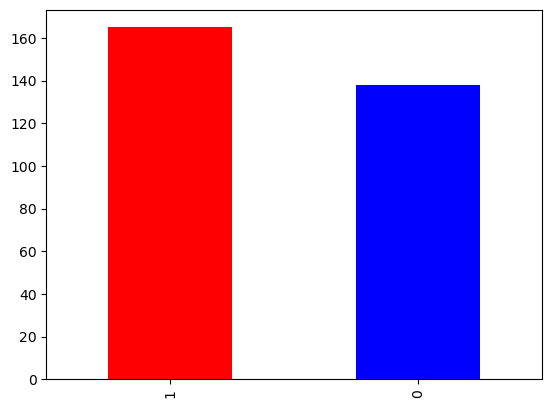

In [15]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [16]:
# Observing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Finding missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64